In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

## Get the Data

In [3]:
df = pd.read_csv('College_Data',)

**Check the head of the data**

In [4]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


In [6]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## EDA

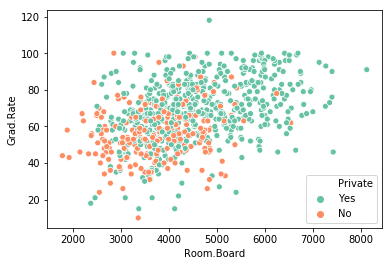

In [9]:
sns.scatterplot(data=df,x='Room.Board',y='Grad.Rate',hue='Private',palette='Set2')

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

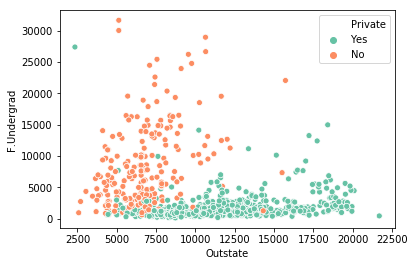

In [10]:
sns.scatterplot(data=df,x='Outstate',y='F.Undergrad',hue='Private',palette='Set2')

** Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

Text(0.5, 0, 'Outstate')

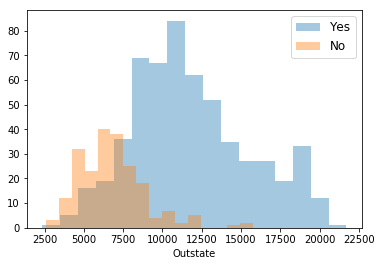

In [13]:
sns.distplot(df[df.Private == 'Yes'].Outstate,  kde=False, label='Yes')
sns.distplot(df[df.Private == 'No'].Outstate,  kde=False,label='No')
plt.legend(prop={'size': 12})
plt.xlabel('Outstate')

**Create a similar histogram for the Grad.Rate column.**

Text(0.5, 0, 'Grad.Rate')

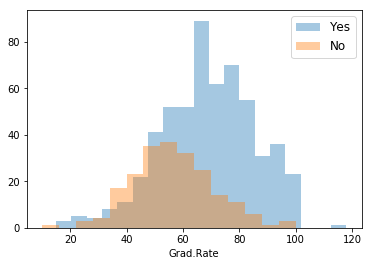

In [15]:
sns.distplot(df[df.Private == 'Yes']['Grad.Rate'],  kde=False, label='Yes')
sns.distplot(df[df.Private == 'No']['Grad.Rate'],  kde=False,label='No')
plt.legend(prop={'size': 12})
plt.xlabel('Grad.Rate')

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [16]:
df[df['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [31]:
df[df.Private=='Yes'].loc[df['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [17]:
df.loc[df['Grad.Rate']>100,'Grad.Rate']=100

In [18]:
df[df.Private=='Yes'].loc[df['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


Text(0.5, 0, 'Grad.Rate')

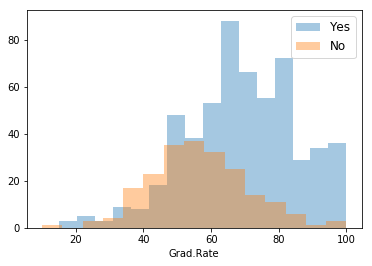

In [19]:
sns.distplot(df[df.Private == 'Yes']['Grad.Rate'],  kde=False, label='Yes')
sns.distplot(df[df.Private == 'No']['Grad.Rate'],  kde=False,label='No')
plt.legend(prop={'size': 12})
plt.xlabel('Grad.Rate')

In [20]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [21]:
x_call = df.columns[2:]

In [22]:
x_call

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
df_std = standard.fit_transform(df[x_call])

c:\users\sonna\anaconda3\envs\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sonna\anaconda3\envs\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
df_std = pd.DataFrame(df_std,columns=x_call)

In [27]:
df_std.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.948375


In [70]:
def plot_BIC(matrix,x_calls,K):
    from sklearn import mixture
    BIC=[]
    for k in K:
        model=mixture.GaussianMixture(n_components=k,init_params='kmeans',random_state=217)
        model.fit(matrix[x_calls])
        BIC.append(model.bic(matrix[x_calls]))
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(K,BIC,'-cx')
    plt.ylabel("BIC score")
    plt.xlabel("k")
    plt.title("BIC scoring for K-means cell's behaviour")
    return(BIC)

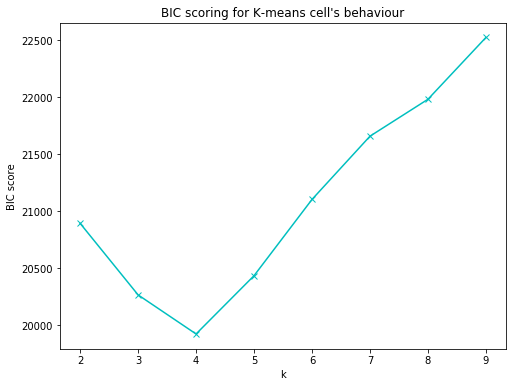

In [71]:
K = range(2,10)
BIC = plot_BIC(df_std,x_call,K)

## K Means Cluster Creation

In [72]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
cluster = KMeans(n_clusters=4,random_state=217)

**Fit the model to all the data except for the Private label.**

In [73]:
df['cluster'] = cluster.fit_predict(df_std[x_call])

In [74]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster,x,y,z
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,70,78,18.1,12,7041,60,2,-1.593465,0.764438,-0.107366
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,29,30,12.2,16,10527,56,2,-2.192662,-0.581414,2.298447
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,53,66,12.9,30,8735,54,2,-1.430232,-1.094707,-0.434822
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,92,97,7.7,37,19016,59,0,2.857842,-2.625830,0.135417
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,76,72,11.9,2,10922,15,2,-2.217581,0.020114,2.381814


Text(0.5, 1.0, 'Cluster of Data')

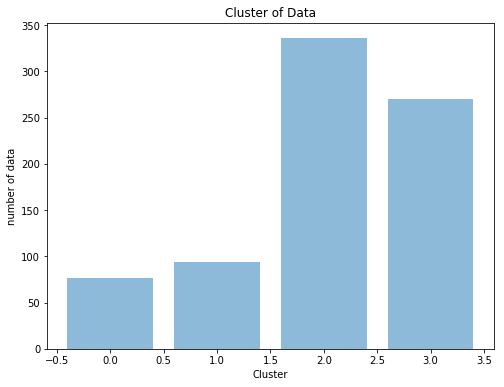

In [75]:
d=pd.DataFrame(df.cluster.value_counts())
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(d.index,d['cluster'],align='center',alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('number of data')
plt.title('Cluster of Data')

In [76]:
cluster.cluster_centers_

array([[ 0.54016607,  0.14501056,  0.02579116,  1.94999651,  1.57852977,
        -0.11105628, -0.41699737,  1.79044913,  1.2041349 ,  0.27215159,
        -0.48040303,  1.15257452,  1.10768901, -1.22525039,  1.32737112,
         2.10616047,  1.16762229],
       [ 1.77429462,  1.9706657 ,  2.16110039,  0.17167997,  0.36932692,
         2.23104697,  1.56067285, -0.57376651, -0.19640721,  0.34849907,
         0.91890232,  0.67081689,  0.66517622,  0.6095756 , -0.5840884 ,
        -0.08747898, -0.37520218],
       [-0.36834308, -0.3575255 , -0.32001027, -0.63860443, -0.6882093 ,
        -0.28649358, -0.10633508, -0.63960564, -0.5465834 , -0.09689809,
         0.119359  , -0.70819445, -0.72339187,  0.32416185, -0.49770808,
        -0.50659417, -0.55928521],
       [-0.31338224, -0.28251786, -0.36150335,  0.17882755,  0.27768445,
        -0.38853792, -0.29209579,  0.48509987,  0.40517004, -0.07835862,
        -0.33144596,  0.31906781,  0.35274462, -0.26620078,  0.44417277,
         0.06023818

In [77]:
from sklearn.metrics.pairwise import euclidean_distances
distance = euclidean_distances(cluster.cluster_centers_, cluster.cluster_centers_)
print(distance)

[[0.         6.89871693 6.7071201  4.00936759]
 [6.89871693 0.         5.67027484 5.67037967]
 [6.7071201  5.67027484 0.         2.98492025]
 [4.00936759 5.67037967 2.98492025 0.        ]]


In [78]:
# Reduction dimention of the data using PCA
pca = PCA(n_components=3)
df['x'] = pca.fit_transform(df_std[x_call])[:,0]
df['y'] = pca.fit_transform(df_std[x_call])[:,1]
df['z'] = pca.fit_transform(df_std[x_call])[:,2]

# Getting the center of each cluster for plotting
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y', 'z'])
cluster_centers['cluster'] = range(0, len(cluster_centers))
print(cluster_centers)

          x         y         z  cluster
0  4.416269 -1.847595  0.312167        0
1  1.638146  4.421186  0.065501        1
2 -1.985483  0.087716  0.084118        2
3  0.641051 -1.121479 -0.216510        3


Text(0.5, 1.0, 'Data Segmentation')

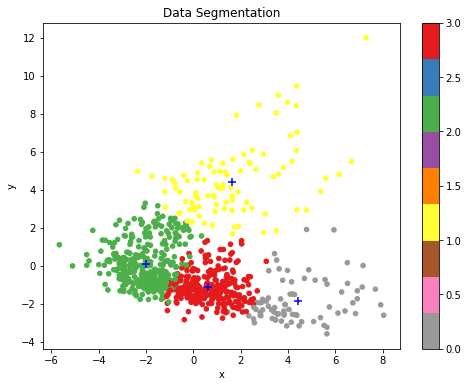

In [79]:
# Plotting for 2-dimention
fig, ax = plt.subplots(figsize=(8, 6))
scatter=ax.scatter(df['x'],df['y'],c=df['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],s=70,c='blue',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
plt.title('Data Segmentation')

Text(0.5, 0.92, 'Data Segmentation')

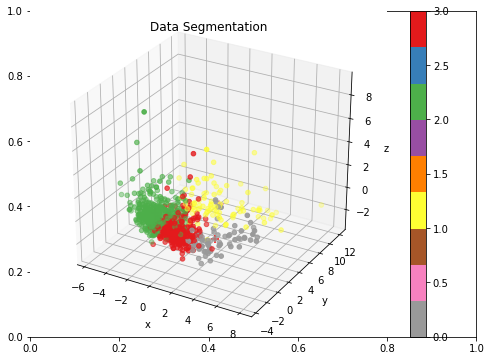

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
scatter=ax.scatter(df['x'],df['y'],df['z'],c=df['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],cluster_centers['z'],s=70,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(scatter)
plt.title('Data Segmentation')